** valencia bounding box  
{"type":"Polygon","coordinates":[[[-0.124146,38.953446],[-0.547119,38.953446],[-0.547119,39.481696],[-0.124146,39.481696],[-0.124146,38.953446]]]}  

** data   
pre-event = 2024-10-07  
post-event = 2024-10-31  

** Data download from ASF search portal: parameters  
    * GRD-HD, ascending, instrument IW, VV+VH pols

In [1]:
# Importing functions from package--
from pysarflow import read_grd_product, subset_AOI, apply_orbit_file, thermal_noise_removal, border_noise_removal, radiometric_calibration, speckle_filter,terrain_correction, plotBand

read grd file

In [2]:
# Path to the .SAFE directory
# pre_event_product_path = "../data/S1A_IW_GRDH_1SDV_20241007T180256_20241007T180321_056000_06D943_D46B.SAFE"
pre_event_product_path = r"C:\Users\Ethel Ogallo\OneDrive - Universität Salzburg\Archive\S1A_IW_GRDH_1SDV_20241007T180256_20241007T180321_056000_06D943_D46B.SAFE"
# post_event_product_path = "../data/S1A_IW_GRDH_1SDV_20241007T180256_20241007T180321_056000_06D943_D46B.SAFE"
post_event_product_path = r"C:\Users\Ethel Ogallo\OneDrive - Universität Salzburg\Archive\S1A_IW_GRDH_1SDV_20241031T180256_20241031T180321_056350_06E71E_479F.SAFE"

# reading GRD product
pre_event_product=read_grd_product(pre_event_product_path)
post_event_product=read_grd_product(post_event_product_path)

Reading SAR product from: C:\Users\Ethel Ogallo\OneDrive - Universität Salzburg\Archive\S1A_IW_GRDH_1SDV_20241007T180256_20241007T180321_056000_06D943_D46B.SAFE...
	Product read successfully.
Reading SAR product from: C:\Users\Ethel Ogallo\OneDrive - Universität Salzburg\Archive\S1A_IW_GRDH_1SDV_20241031T180256_20241031T180321_056350_06E71E_479F.SAFE...
	Product read successfully.


subsetting

In [3]:
aoi_bbox=[-0.547119, 38.953446,-0.124146,39.481696]
pre_event_product_subset=subset_AOI(product=pre_event_product, bbox=aoi_bbox)
post_event_product_subset=subset_AOI(product=post_event_product, bbox=aoi_bbox)

	Subsetting using bounding box: [-0.547119, 38.953446, -0.124146, 39.481696]
	Product subsetted.
	Subsetting using bounding box: [-0.547119, 38.953446, -0.124146, 39.481696]
	Product subsetted.


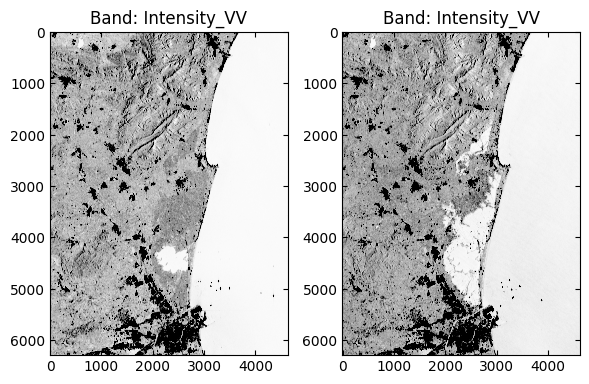

In [4]:
plotBand(pre_event_product_subset, "Intensity_VV", 
         post_event_product_subset, "Intensity_VV", 
         vmin=0, vmax=100000, figsize=(6,4))


apply orbit file to subset

In [5]:
pre_event_product_orbit = apply_orbit_file(pre_event_product_subset)
post_event_product_orbit = apply_orbit_file(post_event_product_subset)

	Applying Orbit File...
	Orbit File applied.
	Applying Orbit File...
	Orbit File applied.


Thermal Noise Removal

In [7]:
pre_event_product_tnr = thermal_noise_removal(pre_event_product_orbit)
post_event_product_tnr = thermal_noise_removal(post_event_product_orbit)

	Performing thermal noise removal...
	Thermal noise removed.
	Performing thermal noise removal...
	Thermal noise removed.


border noise removal

In [8]:
pre_event_product_bnr = border_noise_removal(pre_event_product_tnr)
post_event_product_bnr = border_noise_removal(post_event_product_tnr)

	Performing border noise removal...
	Border noise removed.
	Performing border noise removal...
	Border noise removed.


radiometric callibration

In [9]:
pre_event_product_calibrated = radiometric_calibration(pre_event_product_bnr, polarization='VV', pols_selected='VV')
post_event_product_calibrated = radiometric_calibration(post_event_product_bnr, polarization='VV', pols_selected='VV')

	Radiometric calibration for polarization(s): VV...
	Radiometric calibration completed.
	Radiometric calibration for polarization(s): VV...
	Radiometric calibration completed.


In [ ]:
# check band names
band_names = pre_event_product_calibrated.getBandNames()
print("Band names: {}".format(", ".join(band_names)))

Band names: Sigma0_VV


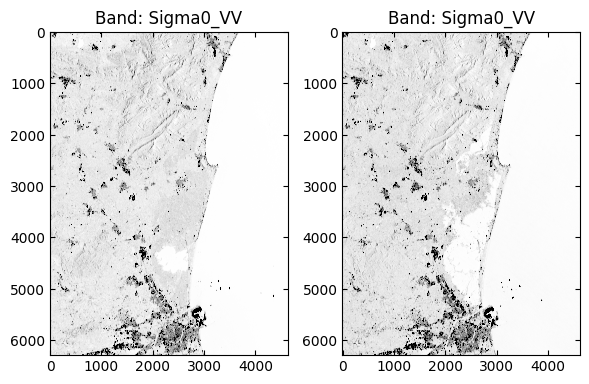

In [14]:
plotBand(pre_event_product_calibrated, "Sigma0_VV", 
         post_event_product_calibrated, "Sigma0_VV", 
         vmin=0, vmax=1, figsize=(6,4))

### speckle filtering

In [15]:
pre_event_product_speckle_filtered = speckle_filter(pre_event_product_calibrated)
post_event_product_speckle_filtered = speckle_filter(post_event_product_calibrated)

	Speckle filter completed.
	Speckle filter completed.


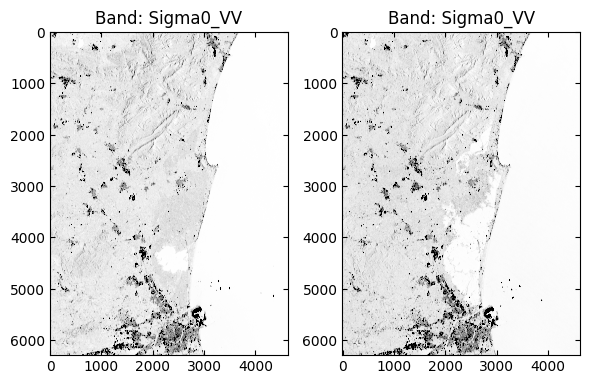

In [16]:
plotBand(pre_event_product_speckle_filtered, "Sigma0_VV", 
         post_event_product_speckle_filtered, "Sigma0_VV", 
         vmin=0, vmax=1, figsize=(6,4))

### Terrain correction

In [18]:
pre_event_product_tc = terrain_correction(pre_event_product_speckle_filtered)
post_event_product_tc = terrain_correction(post_event_product_speckle_filtered)

	Terrain correction completed.
	Terrain correction completed.


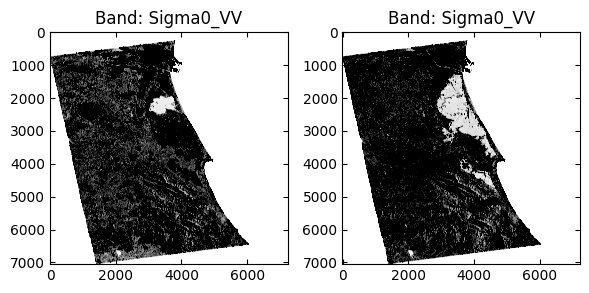

In [19]:
plotBand(pre_event_product_tc, "Sigma0_VV", 
         post_event_product_tc, "Sigma0_VV", 
         vmin=0, vmax=0.1, figsize=(6,4))